In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# 1.Load data
df = pd.read_csv('C:/Users/mehme/OneDrive/Desktop/w1991607_MehmetSezer_E.C/ecom/store/data/2019-Nov.csv', nrows=1_000_000, low_memory=False)
df.dropna(inplace=True)
df['event_time'] = pd.to_datetime(df['event_time'])

# 2. Extract user behavior
behavior_df = df.groupby(['user_id', 'event_type'])['event_time'].count().unstack().fillna(0)

# 3. Complete the missing behavior columns
for col in ['view', 'cart', 'purchase']:
    if col not in behavior_df.columns:
        behavior_df[col] = 0

# 4. Edit name
behavior_df = behavior_df[['view', 'cart', 'purchase']]
behavior_df.rename(columns={
    'view': 'view_count',
    'cart': 'cart_count',
    'purchase': 'purchase_count'
}, inplace=True)

# 5. Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(behavior_df)

# 6. Train the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
behavior_df['segment'] = kmeans.fit_predict(scaled_data)

# 7. Save model and scaler
joblib.dump(kmeans, 'models/behavior_kmeans.pkl')
joblib.dump(scaler, 'models/behavior_scaler.pkl')

# 8. Segment distribution control
print(behavior_df['segment'].value_counts())
print("\nSegment Averages:\n", behavior_df.groupby('segment').mean())

print("The model was successfully trained and registered.")


segment
0    104192
2      8902
3      7989
1       579
Name: count, dtype: int64

Segment Averages:
 event_type  view_count  cart_count  purchase_count
segment                                           
0             3.298276    0.024608        0.000000
1            14.343696    5.870466        3.454231
2             5.478769    0.713211        1.170299
3            24.514583    0.102266        0.056327
The model was successfully trained and registered.


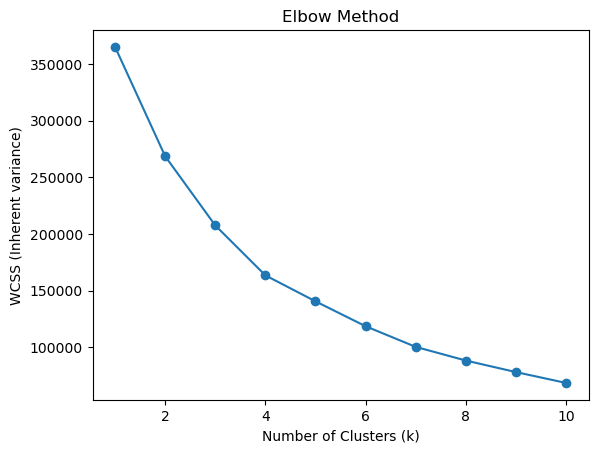

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_data)  
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inherent variance)')
plt.title('Elbow Method')
plt.show()
